# PC analysis

## Principal Components Analysis theory

In this notebook, the Principal Component Analysis (PCA) is performed. With this dimensionality reduction technique we are able to reduce the dimension of the data, which in the case of a regional predictor for the sea-level-pressure fields, exceeds the thousands of variables... All the python code is hosted at `sscode/pca.py`, where we use the scikit-learn package available [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Regarding the maths, an explanation of what PCA is can be found at [wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis) (many other sources explain this technique in detail), but it will be briefly explained here too.

The PCA reduces the dimension of the data by means of a projection in a lower dimensional space that preserves the maximum variance of the sample data. The new vectors are formed by the ones where the projected data have the higher variance. Given the spatiotemporal variable $X_i (x, t_i)$, where $x$ is the spatial data position of dimension $3n1 + 2n2$ and $t_i$ is the time, we apply PCA to obtain a new $d$-dimensional space. The eigenvectors [empirical orthogonal functions (EOFs)] of the covariance matrix of the data define the vectors of the new space. The idea of PCA is to find the minimum $d$ linearly EOFs, so that the transformed components of the original data [principal components (PCs)] explain the maximum variance necessary in the problem at hand. The original data can be expressed as a linear combination of EOFs and PCs,

$$
\boxed{
X (x,t_i) = EOF_1(x)\times PC_1(t_i) + EOF_2(x)\times PC_2(t_i) + ... + EOF_d(x)\times PC_d(t_i)
}
$$

Once we apply PCA, our data are defined by the principal components $X_i^{EOF}={PC_1,PC_2,...,PC_d}, i=1,...,P $. A better online explanation can be also found [here](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-unsupervised-learning)!!

```{figure} ../media/images/pca-analysis.png
---
width: 600px
name: pca
---
This picture shows how the dimensionality reduction that performs PCA might help when identifying patterns in data ([image reference](https://programmerclick.com/images/486/0351bfe3610a3ba89bea599ee9d054ae.png))
```

## Import python libraries

The very first step in all the notebooks we are using consists in importing all the necessary libraries.

In [1]:
# basics
import os, sys

# append sscode to path
import sys, os
sys.path.insert(0, '/Users/administrador/Documents/geocean-nz-ss/')
data_path = '/Users/administrador/Documents/geocean-nz-ss/data/'
os.environ["SSURGE_DATA_PATH"] = data_path

# custom
from sscode.data import Loader, load_moana_hindcast_ss
from sscode.pca import PCA_DynamicPred
from sscode.config import default_region_reduced, default_location

# warnings
import warnings
warnings.filterwarnings('ignore')

DATA PATH /Users/administrador/Documents/geocean-nz-ss/data/


## Load the data without plotting

As always, we first load the data using our `Loader` python class, so then we can easily use all the datasets. Notice that here, we set the `plot` parameters to `False`.

In [2]:
# load the data using the Loader class
load_cfsr_moana_uhslc = Loader(
    data_to_load=('cfsr','moana','uhslc'),
    time_resample='1D',load_winds=(True,None),
    plot=(False,False,False),
    load_predictor_files=(True,(os.environ['SSURGE_DATA_PATH']+'cfsr/CFSR_MSLP_daily.nc',
                                os.environ['SSURGE_DATA_PATH']+'cfsr/CFSR_WINDs_daily.nc'))
)


 loading previously saved atmospheric data from (True, ('/Users/administrador/Documents/geocean-nz-ss/data/cfsr/CFSR_MSLP_daily.nc', '/Users/administrador/Documents/geocean-nz-ss/data/cfsr/CFSR_WINDs_daily.nc')) 


 loading the Moana v2 hindcast data... 


 loading the UHSLC tidal guages... 



## PCA usage explanation 

To use the pre-build PCA functions, the user must get familiar with the datasets and the way everything is programmed. 

```{tip}
For this reason, have always in mind that [xarray](http://xarray.pydata.org/en/stable/getting-started-guide/why-xarray.html) will be the main python data analysis library used in the project, and then, python functions will usually depend on these [Datasets](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html) / [DataArrays](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html), which are very useful when working with multiple dimensions and variables
```

Regarding the PCA usage, have a look at the class in `sscode/pca.py` as this is the aspect of all the functions that are used. For this particular case, we must give the function the previouly loaded slp fields, which are stored at `load_cfsr_moana_uhslc.predictor_slp`, and then specify the actions that we want to perform over this raw dataset.

### PCA code

Below, the attributes of the PCA class are shown, so its use is easier:

```python
    class PCA_DynamicPred(object):

        def __init__(self,
                     pres, 
                     pres_vars: tuple = ('SLP','longitude','latitude'),
                     calculate_gradient: bool = False,
                     wind = None,
                     wind_vars: tuple = ('wind_proj_mask','lon','lat','U_GRD_L103','V_GRD_L103'),
                     # here we could make use of datasets_attrs in config.py file
                     time_lapse: int = 1, # 1 equals to NO time delay                    
                     time_resample: str = '1D',
                     region: tuple = (True,default_region_reduced),
                     # ss_site: tuple = (False, None),
                     site_location = None,
                     pca_plot: tuple = (True,False,2),
                     verbose: bool = True,
                     pca_ttls = None,
                     pca_borders = None,
                     pcs_folder = None,
                     site_id = None,
                     pca_percent = 0.99,
                     pca_method = 'cpu'):
```

so a use case might be:

```python
    pca_example = PCA_DynamicPred(
        load_cfsr_moana_uhslc.predictor_slp.SLP, # make sure we use the dataarray, NOT dataset
        calculate_gradient=True,
        wind=load_cfsr_moana_uhslc.predictor_wind,
        time_lapse=2, # frame in t and t-1
        time_resample='1D', # daily resampling
        region=(True,(150,160,-40,-30)),
        site_location=(155,-45),
        # ...
        # ...
    )
```

## PCA examples:

Below, different PCA analysis with different inputs are shown:

```{warning}
Be careful when trying to perform the PC Analysis over large amounts of data, as it works inversing the matrices of the data, and depending on the computer features, the kernel might die!!
```

### Regional PCs analysis

/Users/administrador/Documents/geocean-nz-ss/data/calculated_pcs/ ['default_region_reduced', 'None', 'winds', 'no_gradients', '1D', 'tl1']
FILE /Users/administrador/Documents/geocean-nz-ss/data/calculated_pcs/default_region_reduced_None_winds_no_gradients_1D_tl1.nc
Assembling matrix

 adding the wind to the predictor... 


 winds predictor with shape: 
 (11354, 45, 51) 


 pcs_matrix with shape: 
 (11353, 4590) 


 calculating PCs matrix with shape: 
 (11353, 4590) 

Computing using CPU
matrix (11353, 4590)
PCs (11353, 27)
comp (27, 4590)
var (27,)
lon <xarray.DataArray 'longitude' (longitude: 51)>
array([160. , 160.5, 161. , 161.5, 162. , 162.5, 163. , 163.5, 164. , 164.5,
       165. , 165.5, 166. , 166.5, 167. , 167.5, 168. , 168.5, 169. , 169.5,
       170. , 170.5, 171. , 171.5, 172. , 172.5, 173. , 173.5, 174. , 174.5,
       175. , 175.5, 176. , 176.5, 177. , 177.5, 178. , 178.5, 179. , 179.5,
       180. , 180.5, 181. , 181.5, 182. , 182.5, 183. , 183.5, 184. , 184.5,
       18

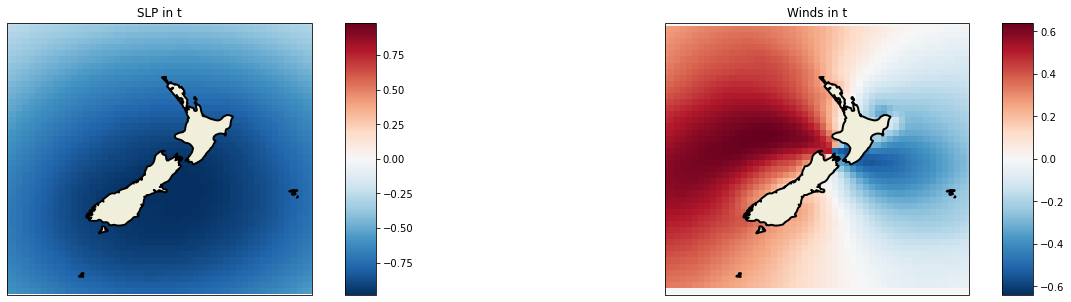

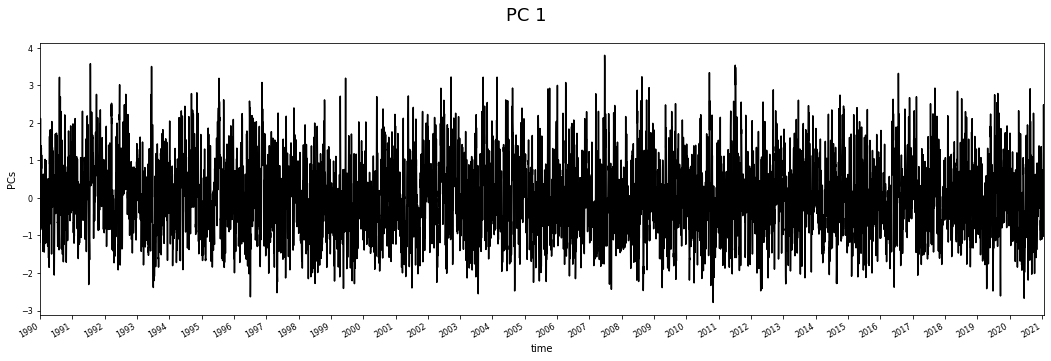

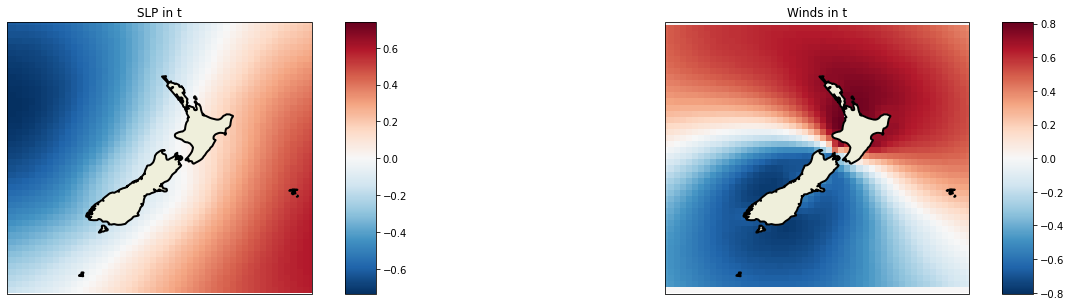

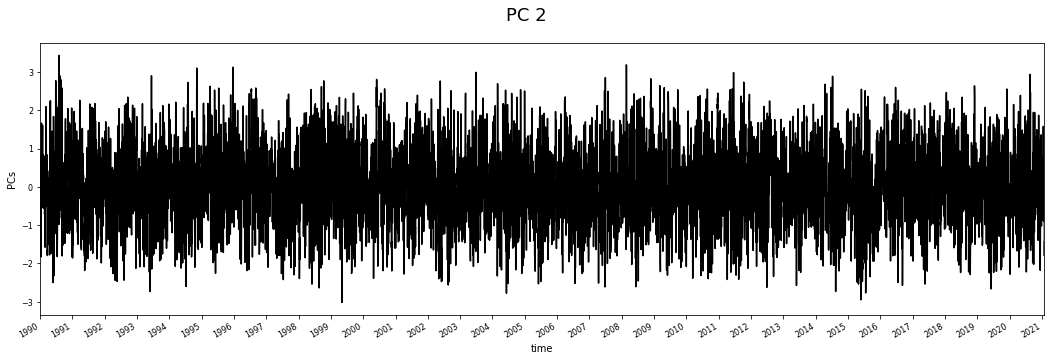

In [4]:
pcs_data, pcs_scaler = PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp.SLP, 
    calculate_gradient=False,
    wind=load_cfsr_moana_uhslc.predictor_wind,
    time_lapse=1, # 1 equals to NO time delay                    
    time_resample='1D', # daily resampling
    region=(True,default_region_reduced),
    site_location=default_location,
    pca_plot=(True,False,2),
    pca_ttls=('SLP in t','Winds in t'),
    pcs_folder='/Users/administrador/Documents/geocean-nz-ss/data/calculated_pcs/'
).pcs_get() # look the simplicity of the function

### Local PCs analysis

/Users/administrador/Documents/geocean-nz-ss/data/calculated_pcs/ ['local_2.5_2.5', 'None', 'winds', 'gradients', '1D', 'tl1']
FILE /Users/administrador/Documents/geocean-nz-ss/data/calculated_pcs/local_2.5_2.5_None_winds_gradients_1D_tl1.nc
Assembling matrix

 adding the wind to the predictor... 


 winds predictor with shape: 
 (11354, 11, 11) 


 calculating the gradient of the sea-level-pressure fields... 


 pressure/gradient predictor both with shape: 
 (11354, 11, 11) 


 pcs_matrix with shape: 
 (11353, 363) 


 calculating PCs matrix with shape: 
 (11353, 363) 

Computing using CPU
matrix (11353, 363)
PCs (11353, 10)
comp (10, 363)
var (10,)
lon <xarray.DataArray 'longitude' (longitude: 11)>
array([175. , 175.5, 176. , 176.5, 177. , 177.5, 178. , 178.5, 179. , 179.5,
       180. ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 175.0 175.5 176.0 176.5 ... 179.0 179.5 180.0
lat <xarray.DataArray 'latitude' (latitude: 11)>
array([-40. , -39.5, -39. , -38.5, -38. 

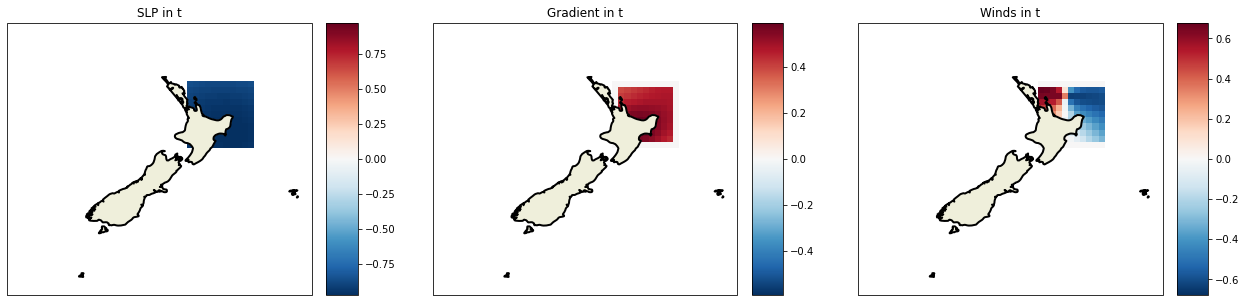

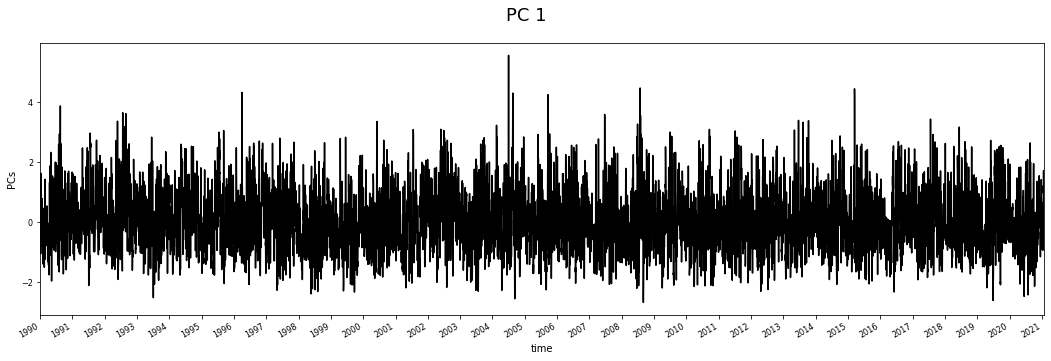

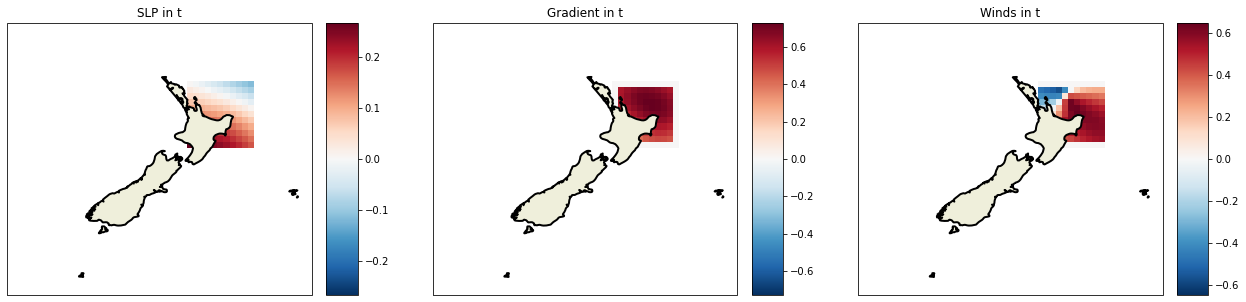

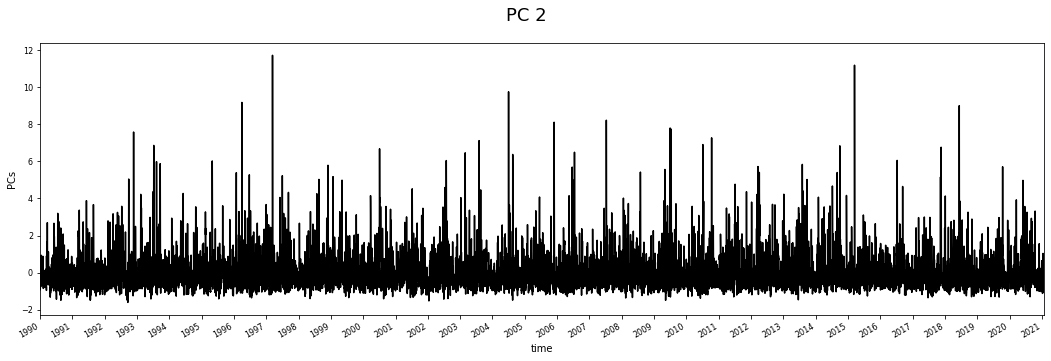

In [5]:
pcs_data, pcs_scaler = PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp.SLP, 
    calculate_gradient=True,
    wind=load_cfsr_moana_uhslc.predictor_wind,
    time_lapse=1, # 1 equals to NO time delay                    
    time_resample='1D', # daily resampling
    region=(True,(175,180,-40,-35)),
    site_location=(177,-36),
    pca_plot=(True,False,2),
    pca_ttls=('SLP in t','Gradient in t','Winds in t'),
    pcs_folder='/Users/administrador/Documents/geocean-nz-ss/data/calculated_pcs/'
).pcs_get() # look the simplicity of the function